# My E commerce behavior analysis project



In [2]:
import os
import json
import pandas as pd
import shap
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [3]:
df_olist_geolocation_dataset = pd.read_csv("olist_geolocation_dataset.csv")
df_olist_order_items_dataset = pd.read_csv("olist_order_items_dataset.csv")
df_olist_order_payments_dataset = pd.read_csv("olist_order_payments_dataset.csv")
df_olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")
df_olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv")
df_olist_products_dataset = pd.read_csv("olist_products_dataset.csv")
df_olist_sellers_dataset = pd.read_csv("olist_sellers_dataset.csv")
df_product_category_name_translation = pd.read_csv("product_category_name_translation.csv")
df_olist_customers_dataset = pd.read_csv("olist_customers_dataset.csv")


In [4]:
# checking the shape
print('Geolocation dataset shape:', df_olist_geolocation_dataset.shape)
print('\nOrder items dataset shape:', df_olist_order_items_dataset.shape)
print('\nOrder payment dataset shape', df_olist_order_payments_dataset.shape)
print('\nOrder reviews dataset shape:', df_olist_order_reviews_dataset.shape)
print('\nOrders dataset shape:', df_olist_orders_dataset.shape)
print('\nproducts dataset shape:', df_olist_products_dataset.shape)
print('\nsellers dataset shape:', df_olist_sellers_dataset.shape)
print('\nproduct category name translation dataset shape:', df_product_category_name_translation.shape)
print('\nCustoners dataset shape:', df_olist_customers_dataset.shape)

Geolocation dataset shape: (1000163, 5)

Order items dataset shape: (112650, 7)

Order payment dataset shape (103886, 5)

Order reviews dataset shape: (99224, 7)

Orders dataset shape: (99441, 8)

products dataset shape: (32951, 9)

sellers dataset shape: (3095, 4)

product category name translation dataset shape: (71, 2)

Custoners dataset shape: (99441, 5)


In [5]:
# checking for info
frames = [df_olist_geolocation_dataset, df_olist_order_items_dataset, df_olist_order_payments_dataset, df_olist_order_reviews_dataset, df_olist_orders_dataset, df_olist_products_dataset, df_olist_sellers_dataset, df_product_category_name_translation, df_olist_customers_dataset]
for f in frames:
    print(f"dataframe info {f.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
dataframe info None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id      

In [6]:
# checking for missing values
for f in frames:
    print(f" null values: {f.isnull().sum()}")

 null values: geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
 null values: order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
 null values: order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
 null values: review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
 null values: order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at        

In [7]:
# summary stats
for f in frames:
    print(f"summary statistic: {f.describe()}")

summary statistic:        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02
summary statistic:        order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000

In [8]:
df_olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in timestamp_cols:
    df_olist_orders_dataset[col] = pd.to_datetime(df_olist_orders_dataset[col])

df_olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [10]:
df_olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
# lets create another column for total price
df_olist_order_items_dataset['total_value'] = df_olist_order_items_dataset['price'] + df_olist_order_items_dataset['freight_value']
df_olist_order_items_dataset_ = df_olist_order_items_dataset.groupby(by = ['order_id', 'product_id', 'shipping_limit_date']).agg(
    product_counts = ('product_id', 'count'),
    total_price = ('price', 'sum'),
    total_value = ('total_value', 'sum')

).reset_index()

df_olist_order_items_dataset_.head()

,order_id,product_id,shipping_limit_date,product_counts,total_price,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,1,58.90,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,1,239.90,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,1,199.00,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,1,12.99,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,1,199.90,218.04


In [12]:
# clean up geolocation table
df_olist_geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [13]:
data_geo = df_olist_geolocation_dataset.sort_values(by = 'geolocation_zip_code_prefix', ascending = True).groupby(by = ['geolocation_city', 'geolocation_state']).head(1)
data_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
771,1001,-23.550498,-46.634338,sao paulo,SP
575,1001,-23.549779,-46.633957,são paulo,SP
10166,1307,-23.556812,-46.657135,sao bernardo do campo,SP
22261,2116,-23.515978,-46.582170,são paulo,RN
50999,3203,-23.216648,-46.861371,jundiaí,SP


In [14]:
# lets merge customers table with items
data_customers = df_olist_orders_dataset.merge(df_olist_order_items_dataset, how = "inner", on = "order_id")\
    .query('order_status == "delivered"')\
    .merge(df_olist_customers_dataset, how = "inner", on = "customer_id")\
    .groupby(by=["customer_city", "customer_state"])\
    .agg(
    orders_count = ('order_id', 'nunique'),
    total_value = ("total_value", "sum"))\
    .sort_values(by="orders_count", ascending=False)\
    .merge(data_geo, how = "inner", left_on = ["customer_city", "customer_state"], right_on = ["geolocation_city", "geolocation_state"])
data_customers["location"] = data_customers["geolocation_city"].apply(lambda x: str(x).title()) + ", " + data_customers["geolocation_state"]


In [15]:
data_customers.head(10)



,orders_count,total_value,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,location
0,15045,2107960.17,1001,-23.550498,-46.634338,sao paulo,SP,"Sao Paulo, SP"
1,6601,1111732.21,20010,-22.904775,-43.172688,rio de janeiro,RJ,"Rio De Janeiro, RJ"
2,2697,405950.51,30001,-19.923989,-43.935706,belo horizonte,MG,"Belo Horizonte, MG"
3,2071,345199.05,70002,-15.790439,-47.880655,brasilia,DF,"Brasilia, DF"
4,1489,238459.72,80002,-25.439563,-49.261963,curitiba,PR,"Curitiba, PR"
5,1406,209002.90,13010,-22.905552,-47.049448,campinas,SP,"Campinas, SP"
6,1342,214805.84,90001,-30.028364,-51.230589,porto alegre,RS,"Porto Alegre, RS"
7,1188,207713.30,40010,-12.969912,-38.511830,salvador,BA,"Salvador, BA"
8,1144,157735.65,7010,-23.467578,-46.529161,guarulhos,SP,"Guarulhos, SP"
9,911,116784.58,1307,-23.556812,-46.657135,sao bernardo do campo,SP,"Sao Bernardo Do Campo, SP"


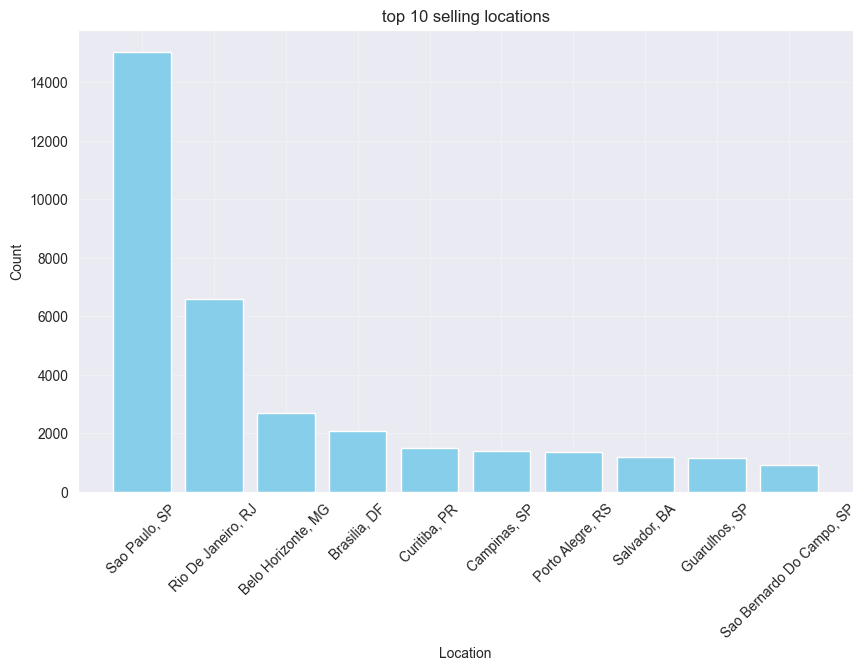

In [16]:
# draw a bar graph showing Top 10 selling geolocation
# x_axis should be the top 10 Locations and Y axis should be orders count
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(data_customers['location'].head(10), data_customers['orders_count'].head(10), color='skyblue')

plt.title('top 10 selling locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.show()

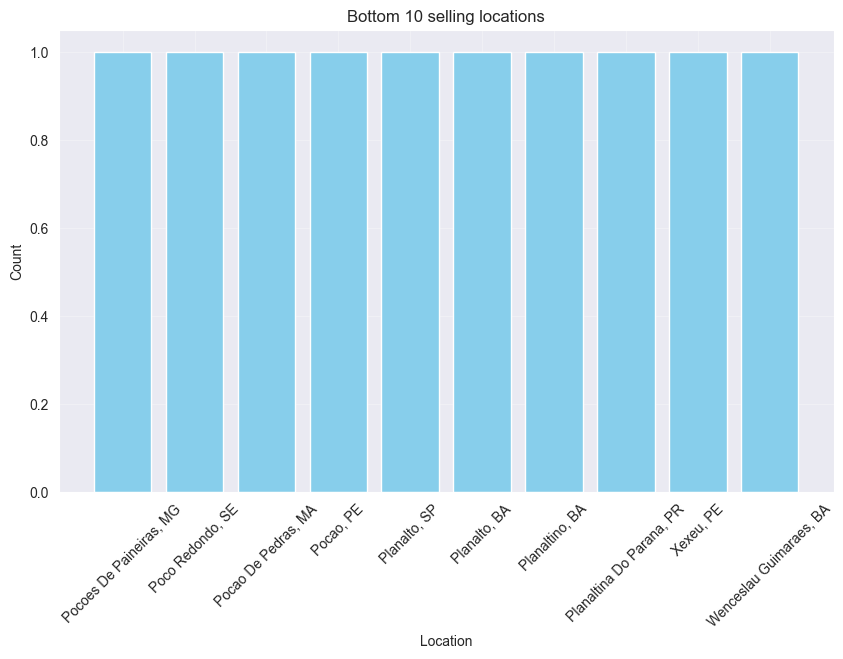

In [17]:
# bottom 10 selling locaton
plt.figure(figsize=(10, 6))
plt.bar(data_customers['location'].tail(10), data_customers['orders_count'].tail(10), color = 'skyblue')
plt.title('Bottom 10 selling locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

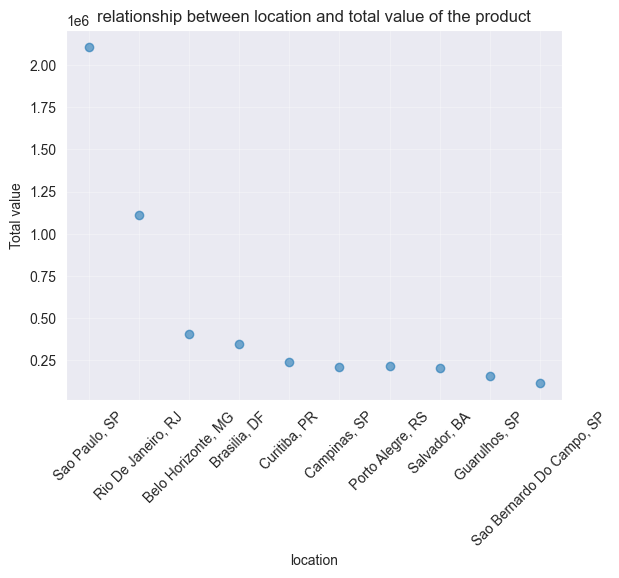

In [18]:
# scatter plot of location vs total value.
plt.scatter(data_customers['location'].head(10), data_customers['total_value'].head(10), alpha = 0.6)
plt.title('relationship between location and total value of the product')
plt.xlabel('location')
plt.ylabel('Total value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

In [19]:
fig  = go.Figure()

fig.add_trace(
    go.Bar(
        x = data_customers["location"].head(10),
        y = data_customers["orders_count"].head(10),
        name = "Number of orders",
        marker_color = "rgb(64, 244, 208)",

    )
)
fig.add_trace(
    go.Scatter(
        x = data_customers["location"].head(10),
        y = data_customers["total_value"].head(10),
        name = "GMV",
        yaxis = "y2",
        marker_color = "rgb(255, 160, 122)",
        mode = "lines+markers",
    )
)

fig.update_layout(
    title = dict(text="<b>Top 10 Selling Geolocation<b>",
                 font=dict(size=12, family="Arial", color="black")),
    plot_bgcolor = "white",
    yaxis = dict(side = "left", range = [0, max(data_customers["orders_count"]) + 1000], showgrid=False, zeroline = True, showline = False, showticklabels = False),
    yaxis2 = dict(side = "right", overlaying = "y", showgrid = False, zeroline = False, showline = False, showticklabels = False),
    xaxis = dict(showline = True, linecolor = "rgb(204, 204, 204)", linewidth = 2),
    legend = dict(orientation = 'h', x = 0.8, y = 1.1),
    annotations = [dict(text="Created by Cyrus", xref="paper", yref="paper", x = 1, y  = .45,
                        showarrow=False, font=dict(size = 10, color = "gray", family="Arial"))],
    hovermode = "x unified"

)
fig.show(renderer = "iframe_connected")

# insights
Sao paulo has the highest order volume and GMV(gross merchandize value) hence it is a key market

Rio de Janeiro and Belo Horizonte both show strong sales performance and revenue contribution

Brasilia has high GMV despite fewer number of orders indicating higher average order value



In [20]:
# function to perform min max scaling
def scaling(x, data, col):
    _min = min(data[col])
    _max = max(data[col])
    return(x - _min) / (_max - _min)

# apply scaling to the orders count column and create a new column with scaled values
data_customers["orders_count_scaling"] = data_customers["orders_count"].apply(lambda x: scaling(x, data_customers, "orders_count"))

data_customers["total_value_scaling"] = data_customers["total_value"].apply(lambda x: scaling(x, data_customers, "total_value"))

lat_center = np.mean(data_customers["geolocation_lat"])
lon_center = np.mean(data_customers["geolocation_lng"])

In [21]:
with open('mapbox_token.txt', 'r') as f:
    token = f.read().strip()

data_customers.loc[0:1, "total_value_scaling"] = data_customers.loc[0:1, "total_value_scaling"]/2

fig = go.Figure(go.Scattermapbox(
    lat=data_customers["geolocation_lat"],
    lon=data_customers["geolocation_lng"],
    mode="markers",
    marker=dict(
        size=data_customers["total_value_scaling"] * 300,
        sizemin=min(data_customers["total_value"]/12),
        color=data_customers["orders_count_scaling"] * 100,
        cmin=min(data_customers["orders_count"]) * 100,
        colorscale="teal"
    ),
    textposition="top right",
    hoverinfo="text",
    hovertext=(
        data_customers["location"].astype(str) + "<br>" +
        "Number_of orders: " + data_customers["orders_count"].astype(str) + "<br>" +
        "GMV: $" + round(data_customers["total_value"], 2).astype(str)
    ),
))

fig.update_layout(
    autosize=True,
    margin={"r": 5, "t": 5, "l": 5, "b": 5},
    hovermode="closest",
    showlegend=False,
    title=dict(
        text="<b>Consumers spending by region</b>",
        font=dict(size=12, family="Arial", color="white"),
        x=0.01,
        y=0.95
    ),
    mapbox=dict(
        accesstoken=token,
        bearing=0,
        center=dict(lat=lat_center, lon=lon_center),
        pitch=0,
        zoom=3,
        style="dark"
    )
)

fig.show(renderer="iframe_connected")

C:\Users\user\AppData\Local\Temp\ipykernel_10016\1234042417.py:6: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



Consumers' spending by state

In [22]:
from urllib.request import urlopen
brazil_geojson_url = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/brazil-states.geojson"

with urlopen(brazil_geojson_url) as response:
    brazil_states = json.load(response)

data_customers_states = data_customers.groupby(by = "geolocation_state")[["orders_count", "total_value"]].sum().reset_index()

state_id_map = {}
for feature in brazil_states["features"]:
    feature["id"] = feature["properties"]["sigla"]
    state_id_map[feature["id"]] = feature["properties"]["name"]

state_id_map


{'AC': 'Acre',
 'AL': 'Alagoas',
 'AM': 'Amazonas',
 'AP': 'Amapá',
 'BA': 'Bahia',
 'CE': 'Ceará',
 'ES': 'Espírito Santo',
 'GO': 'Goiás',
 'MA': 'Maranhão',
 'MG': 'Minas Gerais',
 'MS': 'Mato Grosso do Sul',
 'MT': 'Mato Grosso',
 'PA': 'Pará',
 'PB': 'Paraíba',
 'PE': 'Pernambuco',
 'PI': 'Piauí',
 'PR': 'Paraná',
 'RJ': 'Rio de Janeiro',
 'RN': 'Rio Grande do Norte',
 'RO': 'Rondônia',
 'RR': 'Roraima',
 'RS': 'Rio Grande do Sul',
 'SC': 'Santa Catarina',
 'SE': 'Sergipe',
 'SP': 'São Paulo',
 'TO': 'Tocantins',
 'DF': 'Distrito Federal'}

In [23]:
# lets map state codes and named in geological_state column to corresponding IDs using state_id_map
data_customers_states["name"] = data_customers_states["geolocation_state"].apply(lambda x: state_id_map[x]
                                                                                 ).astype(str)

display(data_customers_states.head())



,geolocation_state,orders_count,total_value,name
0,AC,80,19575.33,Acre
1,AL,397,94172.49,Alagoas
2,AM,145,27585.47,Amazonas
3,AP,67,16141.81,Amapá
4,BA,3242,587373.55,Bahia


In [24]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", None)

In [25]:

def world_map_transaction(df = data_customers_states, feature = "name"):
    import folium
    from geopy.geocoders import Nominatim
    from geopy.extra.rate_limiter import RateLimiter

    df_location = df.copy()

    unique_state = df_location[feature].unique()
    state_coords = {}

    geolocator = Nominatim(user_agent="location_mapper")
    geocode = RateLimiter(
        geolocator.geocode,
        min_delay_seconds = 1,
        max_retries = 3,
        error_wait_seconds=3,
        swallow_exceptions = False
    )
    print(f" fetching co-ordinates for {len(unique_state)} unique state ...")

    # get approximate coordinates for each unique state
    for state in unique_state:
        try:
            loc = geocode(f"{state}, Brazil", timeout=15)
            if loc:
                state_coords[state] = (loc.latitude, loc.longitude)
            else:
                print(f"coordinates not found for {state}")
        except Exception as e:
            print(f"Error fetching coordinates for {state}: {e}")

    #adding coordintes to the dataframe
    df_location["name"] = df_location["name"].astype(str)
    df_location["Coordinates"] = df_location["name"].map(state_coords)
    df_location = df_location[
        df_location["Coordinates"].apply(lambda x: isinstance(x, (list, tuple)) and len(x) == 2)
    ]
    if len(state_coords) > 0:
        initial_coords = list(state_coords.values())[0]
    else:
        print("no coordinates found -initializing map at (0, 0)")
        initial_coords = [0, 0]

    mymap = folium.Map(location=initial_coords, zoom_start=5, tiles = "CartoDB dark_matter")

    for _, row in df_location.iterrows():
        coords = row["Coordinates"]
        tooltip_html = f"""
        <div style='font-size: 13px; line-height: 1.5'>
            <b>State:</b> {row["name"]}<br>
            <b>Sigla:</b> {row["geolocation_state"]}<br>
            <b>Number Order:</b> {row["orders_count"]}<br>
            <b>GMV:</b> ${row["total_value"]:,.2f}
        </div>
        """
        folium.Marker(
            location = coords,
            tooltip=folium.Tooltip(tooltip_html, sticky=True),
            icon=folium.Icon(color = "lightgray", icon="info-sign")
        ).add_to(mymap)
    map_path = f"./saved-map-brazil-olist.html"
    mymap.save(map_path)
    print(f"map saved successfully: {map_path}")

    return mymap
world_map_transaction()


 fetching co-ordinates for 27 unique state ...
map saved successfully: ./saved-map-brazil-olist.html


# Analysis of customers that returned and new customers

In [26]:
# we merge orders with order items to get product level details
# we keep only delivered orders
# we then merge with customers to get customers info
# we create a new column "year_month" from order purchase timestamp
# we select only relevant columns for time series analysis
data_timeseries = (
    df_olist_orders_dataset
    .merge(df_olist_order_items_dataset_, how="left", on="order_id")
    .query('order_status == "delivered"')
    .merge(df_olist_customers_dataset, how="left", on="customer_id")
    .assign(year_month = lambda x: x["order_purchase_timestamp"].dt.to_period("M"))
    [["order_id", "customer_unique_id", "order_purchase_timestamp", "year_month", "product_counts", "total_price", "total_value"]]
)

# create an order index per customer based on purchase timestamp
# rank orders chronologically, for each customer
data_timeseries["order_index"] = data_timeseries.groupby("customer_unique_id")["order_purchase_timestamp"].rank(method = "first", ascending=True)
display(data_timeseries.head())

,order_id,customer_unique_id,order_purchase_timestamp,year_month,product_counts,total_price,total_value,order_index
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10,1.0,29.99,38.71,2.0
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07,1.0,118.70,141.46,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08,1.0,159.90,179.12,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11,1.0,45.00,72.20,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02,1.0,19.90,28.62,1.0


In [27]:
# lets create a monthly summary of new vs returning customer
data_customer_timeseries = (
    data_timeseries.query("order_index == 1")
    .groupby("year_month")
    .agg(
        new_customers_count = ("customer_unique_id", "nunique"),
        new_customers_value=("total_value", "sum"),
    )
    .merge(
        right=(
            data_timeseries.query("order_index > 1")
            .groupby("year_month")
            .agg(return_customers_count= ("customer_unique_id", "nunique"),
                 return_customers_value=("total_value", "sum"),)
        ),
        how = "left",
        on="year_month"
    )
    .fillna(0)
    .reset_index()
)
display(data_customer_timeseries.head())

,year_month,new_customers_count,new_customers_value,return_customers_count,return_customers_value
0,2016-09,1,143.46,0.0,0.00
1,2016-10,262,44687.95,12.0,1802.71
2,2016-12,1,19.62,0.0,0.00
3,2017-01,717,121229.75,46.0,6252.62
4,2017-02,1628,262457.36,63.0,8781.96


In [30]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = data_customer_timeseries["year_month"].astype(str),
        y = data_customer_timeseries["new_customers_count"],
        name = "Number of new customers",
        marker_color = "mediumaquamarine"
    )
)

fig.add_trace(
    go.Bar(
        x = data_customer_timeseries["year_month"].astype(str),
        y = data_customer_timeseries["return_customers_count"],
        name = "Number of returned customers",
        marker_color = "powderblue"
    )
)

fig.add_trace(
    go.Scatter(
        x = data_customer_timeseries["year_month"].astype(str),
        y = data_customer_timeseries["new_customers_value"],
        name = "Revenue from new customers",
        yaxis = "y2",
        marker_color = "indianred",
        mode="lines+markers"
    )
)
fig.add_trace(
    go.Scatter(
        x = data_customer_timeseries["year_month"].astype(str),
        y = data_customer_timeseries["return_customers_value"],
        name = "Revenue from returned customers",
        yaxis = "y2",
        marker_color = "sandybrown",
        mode="lines+markers"
    )
)

fig.update_layout(
    title = dict(text="<b>New Customers And Return Customers By Month<b>",
                 font=dict(size=12, family="Arial", color="black")),
    plot_bgcolor = "white",
    barmode = "stack",
    yaxis = dict(side = "left", showgrid = False, zeroline = True, showline = False, showticklabels = False),
    yaxis2 = dict(side = "right", overlaying = "y", showgrid = False, zeroline = False, showline = False, showticklabels = False),
    xaxis = dict(showline = True, linecolor = "rgb(204, 204, 204)", linewidth = 2),
    legend = dict(orientation="h"),
    hovermode = "x unified",
    annotations=[dict(text="Created By Thuan Dao.", xref="paper", yref="paper", x=1.05, y=-0.25,
    showarrow=False, font=dict(size=10, color="gray", family="Arial"))]
)
fig.show(renderer="iframe_connected")

# insights
in general, majority of customers are new

From 2017 onwards the site has managed to attract new customers and the expenditure from the new groups attributed a large portion

returning customers remains stable all through the periodand spending for them is negligible.

In [31]:
# lets calculate customers lifetime value
data_orders = (
    data_timeseries
    .groupby("customer_unique_id")
    .agg(
        last_purchase_date=("order_purchase_timestamp", "max"),
        order_count = ("order_id", "nunique"),
        quantity=("product_counts", "sum"),
        total_price=("total_price", "sum"),
        total_value=("total_value", "sum")
    )
    .sort_values(by="order_count", ascending=False)
    .reset_index()
)

data_orders.head()

,customer_unique_id,last_purchase_date,order_count,quantity,total_price,total_value
0,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08-20 19:14:26,15,15.0,714.63,879.27
1,3e43e6105506432c953e165fb2acf44c,2018-02-27 18:36:39,9,14.0,1000.85,1172.67
2,6469f99c1f9dfae7733b25662e7f1782,2018-06-28 00:43:34,7,9.0,664.20,758.83
3,1b6c7548a2a1f9037c1fd3ddfed95f33,2018-02-14 13:22:12,7,9.0,809.21,959.01
4,ca77025e7201e3b30c44b472ff346268,2018-06-01 11:38:29,7,12.0,806.61,1122.72


In [33]:
# lets calculate average order value for each customer
data_orders["AOV"] = data_orders["total_value"]/ data_orders["order_count"]

purchase_freq = data_orders["order_count"].sum() / len(data_orders)

repeat_rate = data_orders[data_orders["order_count"] > 1].shape[0] / data_orders.shape[0]

# calculate churn rate: proportion of the customer who did not make a repeat purchase.
churn_rate = 1 - repeat_rate

# estimate profit margin(assume 10% profit on total price)
data_orders["profit_margin"] = data_orders["total_price"] * 0.1


# Calculating customer Lifetime value (CLV)
# CLV = (AOV * purchase frequency) / churn_rate x 100
data_orders["CLV"] = (data_orders["AOV"] * purchase_freq) / churn_rate * 100

q33 = data_orders["CLV"].quantile(0.33)
q66 = data_orders["CLV"].quantile(0.66)

def clv_segment(x):
    if x <= q33:
        return "Low value"
    elif x <= q66:
        return "medium Value"
    else:
        return "High Value"

data_orders["CLV_Segment"] = data_orders["CLV"].apply(clv_segment)

print("Top 10 High_Value Customers: ")
display(data_orders.sort_values(by="CLV", ascending = False).reset_index(drop = True).head(10))

Top 10 High_Value Customers: 


,customer_unique_id,last_purchase_date,order_count,quantity,total_price,total_value,AOV,profit_margin,CLV,CLV_Segment
0,0a0a92112bd4c708ca5fde585afaa872,2017-09-29 15:24:52,1,8.0,13440.00,13664.08,13664.08,1344.000,1.455750e+06,High Value
1,763c8b1c9c68a0229c42c9fc6f662b93,2018-07-15 14:49:44,1,4.0,7160.00,7274.88,7274.88,716.000,7.750542e+05,High Value
2,dc4802a71eae9be1dd28f5d788ceb526,2017-02-12 20:37:36,1,1.0,6735.00,6929.31,6929.31,673.500,7.382378e+05,High Value
3,459bef486812aa25204be022145caa62,2018-07-25 18:10:17,1,1.0,6729.00,6922.21,6922.21,672.900,7.374813e+05,High Value
4,ff4159b92c40ebe40454e3e6a7c35ed6,2017-05-24 18:14:34,1,1.0,6499.00,6726.66,6726.66,649.900,7.166478e+05,High Value
5,4007669dec559734d6f53e029e360987,2017-11-24 11:03:35,1,6.0,5934.60,6081.54,6081.54,593.460,6.479177e+05,High Value
6,eebb5dda148d3893cdaf5b5ca3040ccb,2017-04-18 18:50:13,1,1.0,4690.00,4764.34,4764.34,469.000,5.075853e+05,High Value
7,48e1ac109decbb87765a3eade6854098,2018-06-22 12:23:19,1,1.0,4590.00,4681.78,4681.78,459.000,4.987895e+05,High Value
8,edde2314c6c30e864a128ac95d6b2112,2018-08-03 21:10:16,1,1.0,4399.87,4513.32,4513.32,439.987,4.808420e+05,High Value
9,a229eba70ec1c2abef51f04987deb7a5,2018-05-31 22:57:07,1,2.0,4400.00,4445.50,4445.50,440.000,4.736166e+05,High Value


In [37]:
clv_group_dist = (data_orders["CLV_Segment"].value_counts().reset_index())

fig = make_subplots(rows = 1, cols = 2, specs=[[{'type': 'domain'}, {'type': 'xy'}]])
fig.add_trace(
    go.Pie(
        labels = clv_group_dist["CLV_Segment"],
        values=clv_group_dist["count"],
        textinfo="label+percent",
        hovertemplate="Group: %{label}<br>Number of Customers:%{value}",
        marker=dict(colors=["#E74C3C", "F1C40F", "#27AE60"], line=dict(color="white", width=2)),
        name="CLV Segment Distribution",
        hole=0.8
    ),
    row = 1, col=1
)

fig.add_trace(
    go.Bar(
        x = clv_group_dist["CLV_Segment"].astype(str),
        y = clv_group_dist["count"],
        text = clv_group_dist["count"],
        textposition = "auto",
        marker=dict(color= ["#E74C3C", "#F1C40F", "#27AE60"], line=dict(width = 1, color="white")),
        name = "Count Plot of CLV Segment Distribution"
    ),
    row=1, col=2
)
fig.update_layout(
    title = dict(text="<b>Customer LIfetime Value (CLV segmentation Overview)<b>",
                 font=dict(size=12, family="Arial", color="black")),
    xaxis = dict(showline = True, linecolor = "rgb(204, 204, 204)", linewidth = 2),
    yaxis = dict(side = "left", showgrid = False, zeroline = True, showline = False, showticklabels = False),
    showlegend = False,
    annotations=[dict(text="Created by cyrus", xref="paper", yref="paper", x=1, y=-0.2,
                      showarrow=False, font=dict(size=10, color="gray"))]
)
fig.show(renderer = "iframe_connected")


# Insights
High value customers make up 34% of the total customers with 31736 customers - This are key targets for retention and upselling

Medium value and Low Value segments are nearly equal in size (~33%) each with over 30800 customers - they are ideal for nuturing and growth strategies.

The balanced distribution across segments suggest opportunities for personalized engagements and tiered marketin approaches



In [38]:
# Customer segmentation using RFM(recency, Frequency, monetary) Model
# lets create a new dataframe for RFM analysis with selected columns
df_rfm = (
    data_orders[["customer_unique_id","last_purchase_date", "order_count", "total_price"]].copy()
    .sort_values(by="last_purchase_date", ascending = True)
)

# rename column to standard RFM terminologies
df_rfm.columns = ["customer_unique_id", "last_purchase_date", "freq", "monetary"]

# define the reference date for recency calculation
# add +1 to prevent Recency = 0 for customers who transacted on the last date
recency_date = df_rfm["last_purchase_date"].max() +pd.Timedelta(days=1)

df_rfm["recency"] = df_rfm["last_purchase_date"].apply(
    lambda x: (recency_date - x).days
).fillna(0).astype(int)

display(df_rfm.head())

,customer_unique_id,last_purchase_date,freq,monetary,recency
47882,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,1,134.97,714
18267,2f64e403852e6893ae37485d5fcacdaf,2016-10-03 16:56:50,1,21.90,695
36173,61db744d2f835035a5625b59350c6b63,2016-10-03 21:13:36,1,36.49,695
51400,8d3a54507421dbd2ce0a1d58046826e0,2016-10-03 22:06:03,1,119.90,695
49410,87776adb449c551e74c13fc34f036105,2016-10-03 22:31:31,1,29.99,695


In [40]:
# recency scoring: lower recency = better(more recent purchase)
def r_score(value, r_quartiles):
    if value >= r_quartiles[0.8]:
        return 1
    elif value >= r_quartiles[0.6]:
        return 2
    elif value >= r_quartiles[0.4]:
        return 3
    elif value >= r_quartiles[0.2]:
        return 4
    else:
        return 5

# frequency scoring: higher frequency = better
def f_score(value, f_quartiles):
    if value >= f_quartiles[0.8]:
        return 5
    elif value >= f_quartiles[0.6]:
        return 4
    elif value >= f_quartiles[0.4]:
        return 3
    elif value >= f_quartiles[0.2]:
        return 2
    else:
        return 1

# monetary scoring: higher monetary value = better
def m_score(value, m_quartiles):
    if value >= m_quartiles[0.8]:
        return 5
    elif value >= m_quartiles[0.6]:
        return 4
    elif value >= m_quartiles[0.4]:
        return 3
    elif value >= m_quartiles[0.2]:
        return 2
    else:
        return 1

# compute quatiles for Recency, frequency and monetary

r_quartiles = df_rfm["recency"].quantile([0.2, 0.4, 0.6, 0.8])
f_quartiles = df_rfm["freq"].quantile([0.2, 0.4, 0.6, 0.8])
m_quartiles = df_rfm["monetary"].quantile([0.2, 0.4, 0.6, 0.8])


df_rfm["R_Score"] = df_rfm["recency"].apply(lambda x: r_score(x, r_quartiles))
df_rfm["F_Score"] = df_rfm["freq"].apply(lambda x: f_score(x, f_quartiles))
df_rfm["M_Score"] = df_rfm["monetary"].apply(lambda x: m_score(x, m_quartiles))

# combine all scores into a single score as a string
df_rfm["RFM_Score"] = (
    df_rfm["R_Score"].astype(str) +
    df_rfm["F_Score"].astype(str) +
    df_rfm["M_Score"].astype(str)
)
display(df_rfm.head())


,customer_unique_id,last_purchase_date,freq,monetary,recency,R_Score,F_Score,M_Score,RFM_Score
47882,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,1,134.97,714,1,5,4,154
18267,2f64e403852e6893ae37485d5fcacdaf,2016-10-03 16:56:50,1,21.90,695,1,5,1,151
36173,61db744d2f835035a5625b59350c6b63,2016-10-03 21:13:36,1,36.49,695,1,5,1,151
51400,8d3a54507421dbd2ce0a1d58046826e0,2016-10-03 22:06:03,1,119.90,695,1,5,4,154
49410,87776adb449c551e74c13fc34f036105,2016-10-03 22:31:31,1,29.99,695,1,5,1,151
